### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
# Calcular facturación total (si ya lo hiciste antes, no vuelvas a hacerlo)
tienda["facturacion"] = tienda["Precio"]
tienda2["facturacion"] = tienda2["Precio"]
tienda3["facturacion"] = tienda3["Precio"]
tienda4["facturacion"] = tienda4["Precio"]

# Crear DataFrame resumen
facturacion_total = {
    "Tienda 1": tienda["facturacion"].sum(),
    "Tienda 2": tienda2["facturacion"].sum(),
    "Tienda 3": tienda3["facturacion"].sum(),
    "Tienda 4": tienda4["facturacion"].sum()
}

# Crear DataFrame y formatear los valores como moneda
facturacion_df = pd.DataFrame.from_dict(facturacion_total, orient='index', columns=['Facturación Total'])
facturacion_df['Facturación Total Formateada'] = facturacion_df['Facturación Total'].apply(lambda x: f"${x:,.2f}")

# Mostrar tabla formateada
display(facturacion_df[['Facturación Total Formateada']])



,Facturación Total Formateada
Tienda 1,"$1,150,880,400.00"
Tienda 2,"$1,116,343,500.00"
Tienda 3,"$1,098,019,600.00"
Tienda 4,"$1,038,375,700.00"


In [4]:
print("Columnas de tienda 1:")
print(tienda.columns)


Columnas de tienda 1:
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'facturacion'],
      dtype='object')


# 2. Ventas por categoría

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277


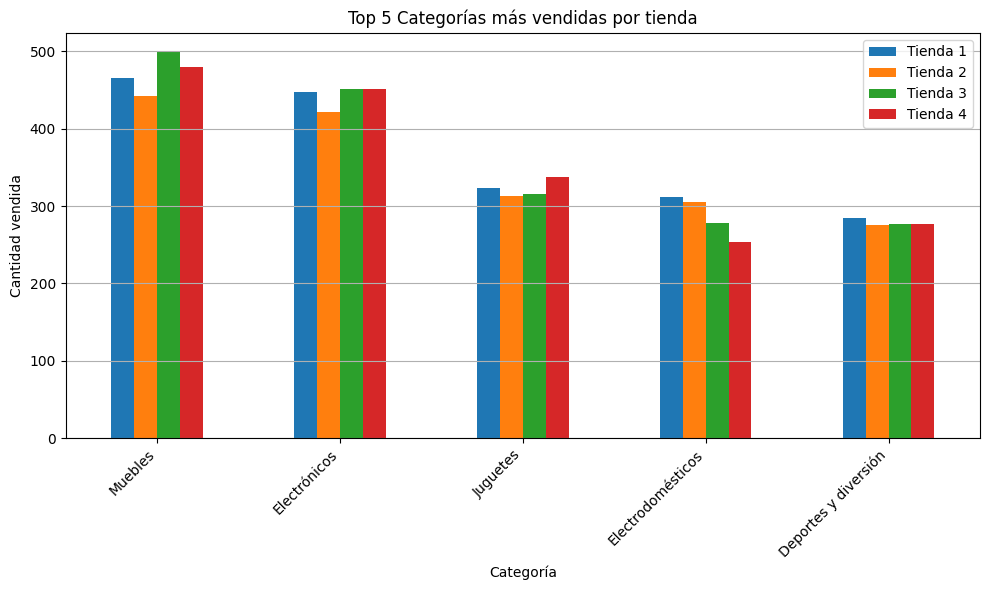

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Diccionario con las 4 tiendas
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

# Crear un resumen con la cantidad vendida por categoría en cada tienda
top_categorias_df = pd.DataFrame()

for nombre, df in tiendas.items():
    conteo = df["Categoría del Producto"].value_counts()
    top_categorias_df[nombre] = conteo

# Reemplazamos NaN con 0 en caso de que alguna categoría no esté en una tienda
top_categorias_df = top_categorias_df.fillna(0)

# Tomamos las 5 categorías más vendidas en total (sumando todas las tiendas)
categorias_mas_comunes = top_categorias_df.sum(axis=1).sort_values(ascending=False).head(5).index

# Filtramos el DataFrame solo para esas 5 categorías
top_categorias_df = top_categorias_df.loc[categorias_mas_comunes]

# Mostrar tabla resumen
display(top_categorias_df)

# Gráfico de barras agrupadas
top_categorias_df.plot(kind='bar', figsize=(10,6))
plt.title("Top 5 Categorías más vendidas por tienda")
plt.ylabel("Cantidad vendida")
plt.xlabel("Categoría")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()




# 3. Calificación promedio de la tienda


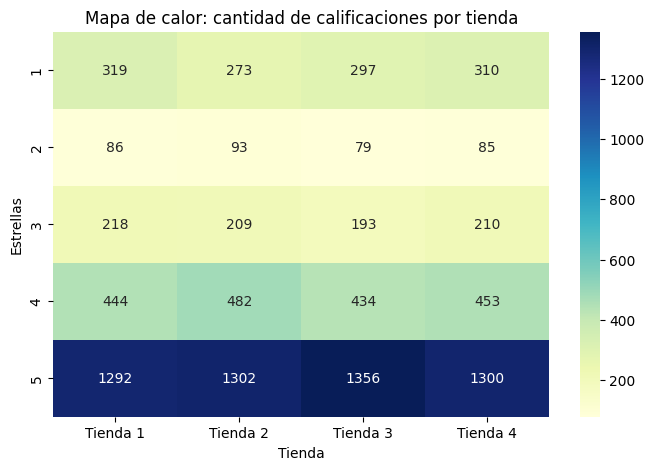

In [16]:
# Usamos el mismo DataFrame calificaciones_por_valor del gráfico anterior
plt.figure(figsize=(8,5))
sns.heatmap(calificaciones_por_valor, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Mapa de calor: cantidad de calificaciones por tienda")
plt.xlabel("Tienda")
plt.ylabel("Estrellas")
plt.show()


# 4. Productos más y menos vendidos

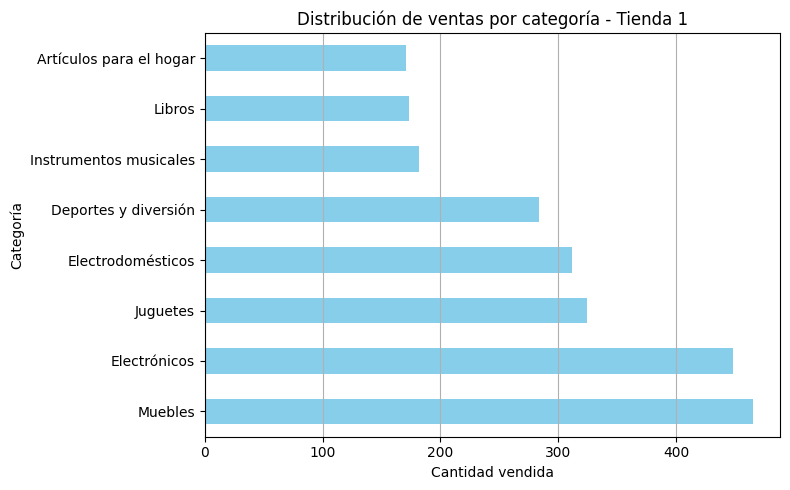

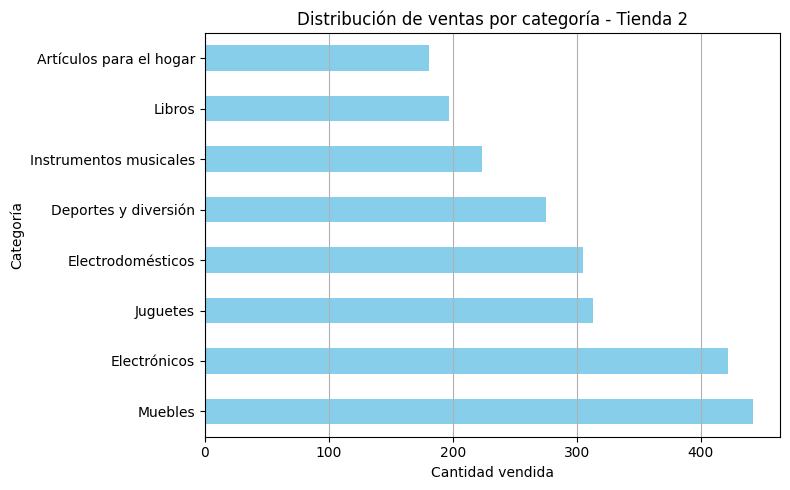

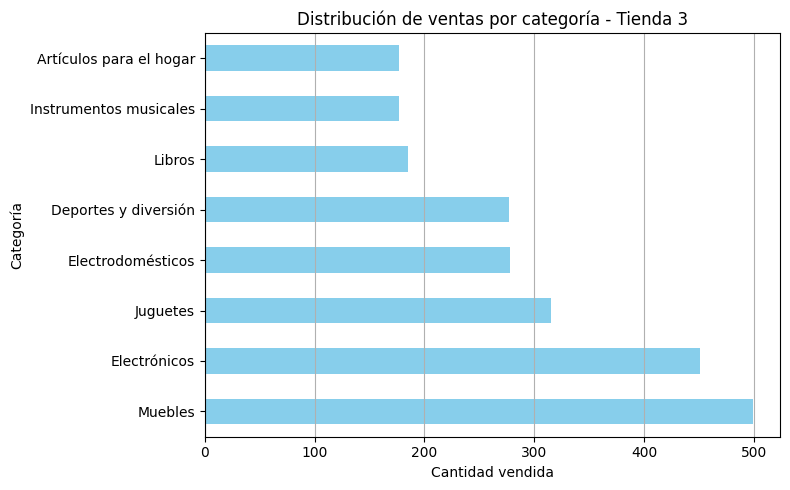

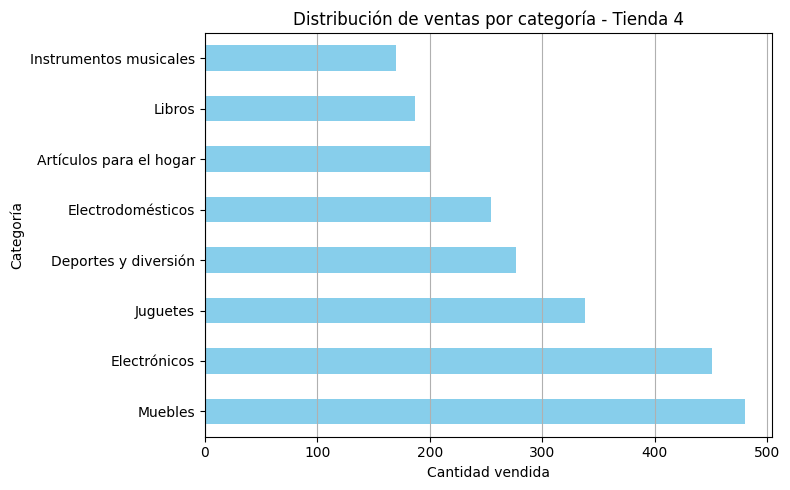

In [6]:
# Gráfico de barras horizontales por tienda - categorías
for nombre, df in tiendas.items():
    categorias = df["Categoría del Producto"].value_counts()

    categorias.plot(kind='barh', figsize=(8,5), color='skyblue')
    plt.title(f"Distribución de ventas por categoría - {nombre}")
    plt.xlabel("Cantidad vendida")
    plt.ylabel("Categoría")
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()



In [21]:
for nombre, df in tiendas.items():
    cantidad = df["Categoría del Producto"].nunique()
    print(f"{nombre}: {cantidad} categorías únicas")


Tienda 1: 8 categorías únicas
Tienda 2: 8 categorías únicas
Tienda 3: 8 categorías únicas
Tienda 4: 8 categorías únicas


# 5. Envío promedio por tienda

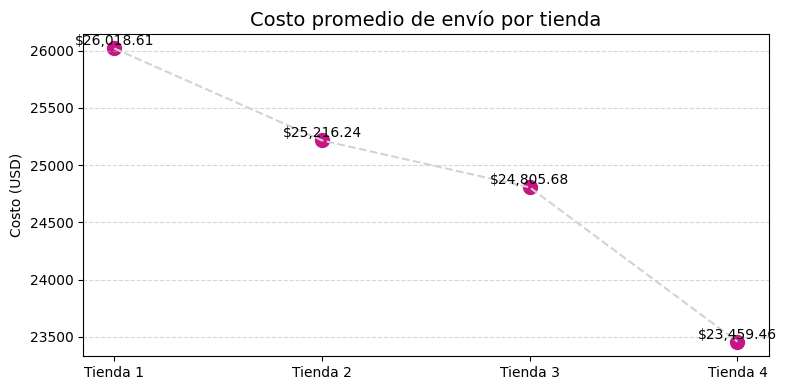

In [9]:
# Recalcular envío promedio por tienda
envio_promedio = {
    "Tienda 1": tienda["Costo de envío"].mean(),
    "Tienda 2": tienda2["Costo de envío"].mean(),
    "Tienda 3": tienda3["Costo de envío"].mean(),
    "Tienda 4": tienda4["Costo de envío"].mean()
}

# Crear DataFrame
envio_df = pd.DataFrame.from_dict(envio_promedio, orient='index', columns=['Costo Promedio de Envío'])

# Gráfico de puntos
plt.figure(figsize=(8,4))
plt.scatter(envio_df.index, envio_df["Costo Promedio de Envío"], color='mediumvioletred', s=100)
plt.plot(envio_df.index, envio_df["Costo Promedio de Envío"], color='lightgray', linestyle='--')

for i, value in enumerate(envio_df["Costo Promedio de Envío"]):
    plt.text(i, value + 0.5, f"${value:,.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Costo promedio de envío por tienda", fontsize=14)
plt.ylabel("Costo (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

